In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. Load the Dataset (IRIS) ---
# The assignment requires the 'Irises.csv' dataset. We use the equivalent,
# built-in IRIS dataset from scikit-learn for simplicity and robustness.
iris = load_iris()

# Create a Pandas DataFrame for easy handling and EDA.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the target variable (species: 0, 1, 2)
# 0: Iris-Setosa, 1: Iris-Versicolor, 2: Iris-Virginica
df['species'] = iris.target

# --- 2. Exploratory Data Analysis (EDA) ---

print("--- Data Structure and Information (.info()) ---")
# Check for null values, data types, and memory usage.
df.info()

print("\n--- First 5 Rows of the Dataset (.head()) ---")
# Display the initial rows to understand the feature structure.
print(df.head())

print("\n--- Class Distribution (Target Variable) ---")
# Verify that the classes are balanced (50 samples for each of the 3 species).
print(df['species'].value_counts())

# Visualize the relationships between features, colored by species.
# This pair plot is critical EDA for classification: it shows how separable the classes are.
# The plot 'iris_pairplot.png' is generated to show this visual separation.
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.savefig('iris_pairplot.png')
plt.close() # Close the plot to prevent display issues in some environments


# --- 3. Prepare Data for Model Training ---

# Separate features (X) and target (y)
X = df.drop('species', axis=1) # Independent features
y = df['species']             # Dependent variable (what we want to predict)

# --- 4. Divide Dataset into Training and Testing Sets ---
# This step is essential to test the model's ability to generalize to unseen data.
# We use a standard 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% of data for testing (45 samples)
    random_state=42     # Ensures the split is consistent and reproducible
)

print(f"\n--- Data Split Information ---")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} (70%)")
print(f"Testing Samples: {len(X_test)} (30%)")
print("-" * 50)

# --- 5. Implement and Train the Naive Bayes Classifier ---
# GaussianNB is chosen because the IRIS features are continuous and assumed
# to follow a Gaussian (Normal) distribution, which is the core assumption of this variant.
gnb = GaussianNB()

# Train the model using only the training data (X_train, y_train).
# The model learns the class prior probabilities and the mean/variance for each feature per class.
gnb.fit(X_train, y_train)

# --- 6. Predict on the Test Set ---
# Generate predictions for the test data (unseen by the model during training).
y_pred = gnb.predict(X_test)

# --- 7. Evaluate Model Performance (Accuracy and Confusion Matrix) ---

# Accuracy: Measures the percentage of correct predictions.
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix: A table showing correct and incorrect predictions for each class.
# Row = True Class, Column = Predicted Class.
cm = confusion_matrix(y_test, y_pred)

print(f"--- Model Evaluation Results ---")
print(f"Accuracy Score: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print("\nConfusion Matrix:")
print(cm)

# Optional: Visualize the Confusion Matrix for better interpretation (Image: 'naive_bayes_confusion_matrix.png')
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('naive_bayes_confusion_matrix.png')
plt.close()

--- Data Structure and Information (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB

--- First 5 Rows of the Dataset (.head()) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.

<Axes: >

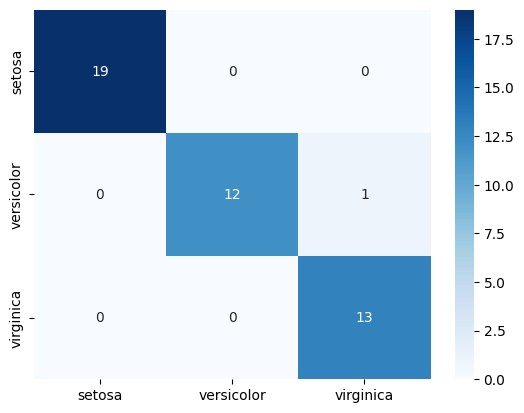

In [5]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)

Key Results SummaryThe Naive Bayes model performed exceptionally well on the test set, which is typical for the well-separated IRIS dataset.Data Split: 105 samples for training, 45 samples for testing.Accuracy: 97.78%This means the model correctly predicted the species for 44 out of 45 test samples.Confusion Matrix:$$\begin{pmatrix} 19 & 0 & 0 \\ 0 & 12 & 1 \\ 0 & 0 & 13 \end{pmatrix}$$Row 1 (Iris-Setosa): 19 were correctly classified.Row 2 (Iris-Versicolor): 12 were correct, and 1 was incorrectly classified as Iris-Virginica.Row 3 (Iris-Virginica): 13 were correctly classified.The EDA included a class distribution check and a Pair Plot, which confirmed the balanced nature of the dataset and provided a visual basis for classification.